Linear regression meenggunakan multiple variables.  
SLR 1 dependent & 1 independent, 1 predictor.  
MLR 1 dependent & multiple independent, multiple predictor.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
df_adm = pd.read_csv('Admission_Predict.csv')

In [3]:
df_adm.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


### Overview

In [4]:
df_adm = df_adm.drop(['Serial No.'], axis = 1)

In [5]:
df_adm.isna().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [6]:
df_adm.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [7]:
df_adm.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


### Find best coefficient to determine Y

1. Independent must have strong correlation with dependent
2. Independent should not have strong correlation with other independent variable

In [8]:
df_adm.shape

(400, 8)

In [9]:
df_adm.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


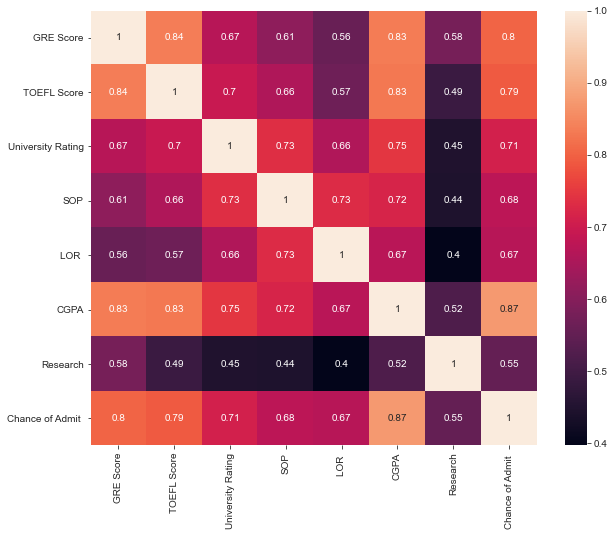

In [10]:
corr_data = df_adm.corr()
plt.figure(figsize = (10,8))
sns.set_style('ticks')
sns.heatmap(corr_data, annot = True)
plt.show()

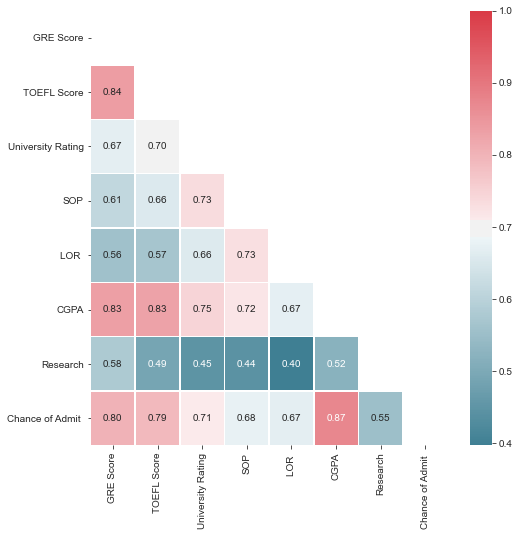

In [11]:
corr = df_adm.corr()
fig, ax = plt.subplots(figsize = (8,8))
colormap = sns.diverging_palette(220,10, as_cmap = True)
dropSelf = np.zeros_like(corr)
dropSelf[np.triu_indices_from(dropSelf)] = True
colormap = sns.diverging_palette(220,10, as_cmap = True)
sns.heatmap(corr, cmap = colormap, linewidths = 0.5, annot = True, fmt = '.2f', mask = dropSelf)
plt.show()

### Splitting Datasets

In [12]:
x = df_adm[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research']].values
y = df_adm['Chance of Admit '].values

### Visualize Target Feature 

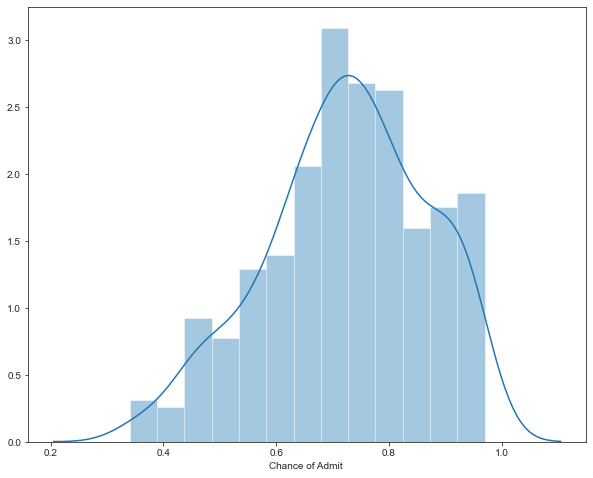

In [13]:
plt.figure(figsize = (10,8))
plt.tight_layout()
sns.distplot(df_adm['Chance of Admit '])

In [14]:
df_adm['Chance of Admit '].describe().std()

141.2005373652785

### Training Model

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=0)

In [16]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Slope

In [17]:
regressor.coef_

array([ 0.00207128,  0.00195523,  0.00657193, -0.00472847,  0.02118445,
        0.12463177,  0.02414366])

In [18]:
x_columns = df_adm[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research']].columns
coeff_df = pd.DataFrame(regressor.coef_, x_columns, columns = ['Coefficient'])
coeff_df

,Coefficient
GRE Score,0.002071
TOEFL Score,0.001955
University Rating,0.006572
SOP,-0.004728
LOR,0.021184
CGPA,0.124632
Research,0.024144


In [19]:
regressor.intercept_

-1.304713830082413

In [20]:
y_pred = regressor.predict(x_test)

In [21]:
df = pd.DataFrame({'Actual' : y_test, 
                  'Predicted' : y_pred})

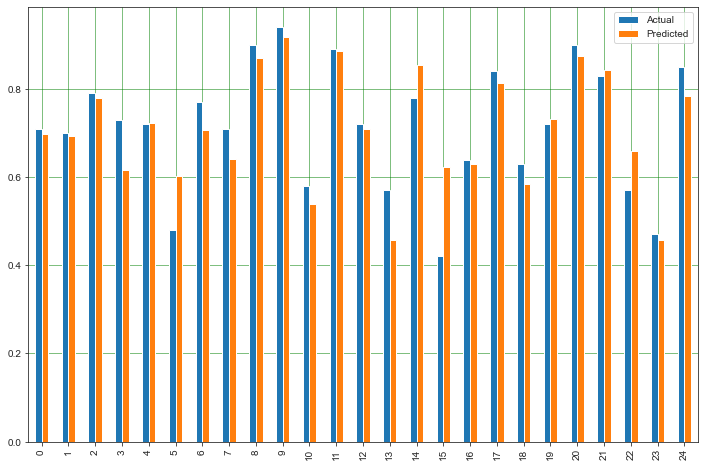

In [22]:
df.head(25).plot(kind = 'bar', figsize = (12,8))
plt.grid(which = 'major', linestyle = '-', linewidth = '0.5', color = 'green')
plt.grid(which = 'minor', linestyle = ':', linewidth = '0.5', color = 'black')
plt.show()

### Evaluating Model Using MAE, MSE & RMSE

In [23]:
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error :', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error :', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', round(metrics.r2_score(y_test, y_pred), 2))

Mean Absolute Error : 0.05008754843817953
Mean Squared Error : 0.004805156569785205
Root Mean Squared Error : 0.06931923665033542
R2 Score: 0.74


In [24]:
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
MAE = metrics.mean_absolute_error(y_test, y_pred)
mean_target = df_adm['Chance of Admit '].mean()

print('Percentage of Error by RMSE', round(RMSE / mean_target *100,2), 'persen')
print('Percentage of Error by MAE', round(MAE / mean_target *100,2), 'persen')

Percentage of Error by RMSE 9.57 persen
Percentage of Error by MAE 6.91 persen
